
Step 1. [Download history price and clean data](/notebooks/forex/hawkeye/1_download.ipynb)

Step 2. [Use monte carlo simulate each stock's movement for 10000 times](/notebooks/forex/hawkeye/2_process.ipynb)

**Step 3. Apply some heuristic rules to give stock recommendation**

In [142]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import os
import sys

sys.path.append('/opt/hawkeye')
from asx import *

this_week = 20190621
last_week = 20190614
path = f'/opt/hawkeye/data/{this_week}/result.csv'
last_path = f'/opt/hawkeye/data/{last_week}/result.csv'
matplotlib.rcParams['figure.figsize'] = (16, 6)

def week_return_avg(df):
    return round(df['week_return'].dropna().sum()/len(df['week_return'].dropna()),4)

df = pd.read_csv(path,
                 usecols=[
                     'code', 'last_date', 'start price', 'sim_mean',
                     'sim_diff', 'VaR 99%', 'VaR 99% Percent', 'volume_mean',
                     'return_mean', 'return_sigma'
                 ],
                 index_col='code')
last_df = pd.read_csv(last_path,
                      usecols=[
                          'code', 'last_date', 'start price', 'sim_mean',
                          'sim_diff', 'VaR 99%', 'VaR 99% Percent',
                          'volume_mean', 'return_mean', 'return_sigma'
                      ],
                      index_col='code')

print(f'Total stock number = {len(df)}')

# remove bottom volume and bottom price
# volume_threshold = df['volume_mean'].quantile(0.1)
# df = df[(df['volume_mean'] > volume_threshold) & (df['start price'] > 0.05)]

# calculate return & risk rank
df['return'] = round(df['sim_diff'] / df['start price'] * 100, 3)
df['return_rank'] = round(df['return'].rank(pct=True) * 100, 3)
df['risk_rank'] = round(df['VaR 99% Percent'].rank(pct=True) * 100, 3)
df['volume_rank'] = round(df['volume_mean'].rank(pct=True) * 100, 3)
df['rank'] = df['return_rank'] - df['risk_rank']
# last week performance
df['last_return'] = round(last_df['sim_diff'] / last_df['start price'] * 100,3)
df['return_increase'] = df['return'] - df['last_return']
df['return_increase_rank'] = round(df['return_increase'].rank(pct=True) * 100, 3)
df['week_return'] = round(
    (df['start price'] - last_df['start price']) / df['start price'] * 100, 3)

# drop used columns
df.drop(columns=['sim_diff', 'sim_mean', 'VaR 99%', 'volume_mean', 'return_increase'], inplace=True)# 'VaR 99% Percent'

print(f'Total stock number after bottom volume & price removed = {len(df)}')
print('Price 70%% pricetile = %s' % df['start price'].quantile(0.7))
print('Sim return 90%% percentile = %s' % df['return'].quantile(0.9))

df.drop(['MMJ'], inplace=True)
df.sort_values(by='return', ascending=False).head(20)

Total stock number = 1789
Total stock number after bottom volume & price removed = 1789
Price 70% pricetile = 0.88
Sim return 90% percentile = 1.2986
Total stock number = 1788


,last_date,start price,VaR 99% Percent,return_mean,return_sigma,return,return_rank,risk_rank,volume_rank,rank,last_return,return_increase_rank,week_return
code,,,,,,,,,,,,,
CLZ,2019-06-21 00:00:00,0.0015,50.8400,0.041246,0.326541,8.710,100.000,99.832,95.920,0.168,7.293,99.747,33.333
OCC,2019-06-21 00:00:00,0.4650,56.2797,0.036580,0.366117,7.608,99.944,99.944,91.839,0.000,NaN,NaN,NaN
R3D,2019-06-21 00:00:00,0.0400,37.9091,0.033782,0.226339,7.019,99.888,99.217,1.006,0.671,NaN,NaN,NaN
ROG,2019-06-21 00:00:00,0.0020,40.5901,0.031049,0.240593,6.186,99.832,99.553,94.746,0.279,4.792,99.684,0.000
ZER,2019-06-18 00:00:00,0.3550,39.3018,0.026701,0.224599,5.596,99.776,99.329,1.118,0.447,5.453,75.694,-4.225
FTC,2019-06-21 00:00:00,0.1500,33.1480,0.026404,0.190699,5.310,99.721,98.379,73.393,1.342,5.079,84.091,-3.333
PCK,2019-06-21 00:00:00,0.1950,23.8344,0.024674,0.135754,4.986,99.665,94.913,91.615,4.752,NaN,NaN,NaN
NVO,2019-06-21 00:00:00,0.0120,30.5730,0.021710,0.172299,4.730,99.609,97.820,95.696,1.789,NaN,NaN,NaN
AIR,2019-06-21 00:00:00,1.5200,19.4715,0.024077,0.111394,4.663,99.553,89.715,4.528,9.838,4.547,72.664,0.000


## Last week review

In [13]:
selection = ['CHC', 'MFG', 'MGR', 'TLS', 'DDR', 'ASX', 'MVF', 'DTL', 'CKF', 'ASB', 'EML', 'GMG', 'APE', 'ABP', 'AD8', 'CNI', 'APA', 'RIO', 'TCL', 'MND']
last_week_df = df[df.index.isin(selection)]
last_week_df.sort_values(by='return', ascending=False).head(10)

,last_date,start price,return_mean,return_sigma,return,return_rank,risk_rank,volume_rank,last_return,return_increase_rank,week_return
code,,,,,,,,,,,
EML,2019-06-21 00:00:00,3.050,0.008072,0.025942,1.612,94.945,21.737,73.346,1.513,71.312,5.246
AD8,2019-06-21 00:00:00,8.250,0.008053,0.026910,1.569,94.485,28.033,46.875,1.573,45.320,3.758
MFG,2019-06-21 00:00:00,51.200,0.006484,0.017535,1.255,91.636,7.996,69.485,1.099,80.570,7.031
DDR,2019-06-21 00:00:00,4.870,0.005463,0.025817,1.076,89.384,26.838,41.085,1.446,4.171,-15.400
APE,2019-06-21 00:00:00,10.130,0.005213,0.021879,1.014,88.971,19.485,22.335,1.056,33.978,2.270
ASB,2019-06-21 00:00:00,3.280,0.005114,0.018767,1.004,88.741,13.787,79.871,0.804,84.741,7.012
MVF,2019-06-21 00:00:00,1.430,0.004841,0.017710,0.918,86.765,12.040,62.776,0.766,79.959,6.294
DTL,2019-06-21 00:00:00,2.210,0.003590,0.014193,0.717,81.250,6.618,52.757,0.613,71.821,3.167
CNI,2019-06-21 00:00:00,1.775,0.003588,0.015633,0.680,79.825,9.099,67.555,0.612,64.903,3.380


In [14]:
week_return = round(sum(last_week_df['week_return'])/len(selection), 3)
win_rate = round(len(last_week_df[last_week_df['week_return'] >= 0]) / len(selection), 3)
print('Last week average return:', week_return, ' , win rate:', win_rate)

Last week average return: 0.542  , win rate: 0.65


## Signle performance review

In [63]:
def inspect(code):
    print(f'http://h.luotao.net/prediction/{this_week}/{code}_line.png')
    print(f'http://h.luotao.net/media/{this_week}/pic/{code}.png')
    
    return df[df.index==code]

In [64]:
inspect('MCX')

http://h.luotao.net/prediction/20190621/MCX_line.png
http://h.luotao.net/media/20190621/pic/MCX.png


,last_date,start price,return_mean,return_sigma,return,return_rank,risk_rank,volume_rank,rank,last_return,return_increase_rank,week_return
code,,,,,,,,,,,,


# Return & Risk Rank

In [44]:
top_df = df.sort_values(by='rank', ascending=False).head(20)
week_return = round(sum(top_df['week_return'].dropna())/len(top_df), 3)
print('Top rank last week average return:', week_return)
top_df

Top rank last week average return: 3.429


,last_date,start price,return_mean,return_sigma,return,return_rank,risk_rank,volume_rank,last_return,return_increase_rank,week_return,rank
code,,,,,,,,,,,,
MFG,2019-06-21 00:00:00,51.200,0.006484,0.017535,1.255,91.636,7.996,69.485,1.099,80.570,7.031,83.640
ASB,2019-06-21 00:00:00,3.280,0.005114,0.018767,1.004,88.741,13.787,79.871,0.804,84.741,7.012,74.954
MVF,2019-06-21 00:00:00,1.430,0.004841,0.017710,0.918,86.765,12.040,62.776,0.766,79.959,6.294,74.725
DTL,2019-06-21 00:00:00,2.210,0.003590,0.014193,0.717,81.250,6.618,52.757,0.613,71.821,3.167,74.632
CHC,2019-06-21 00:00:00,11.110,0.003247,0.012366,0.638,78.263,3.952,83.548,0.826,11.953,-3.690,74.311
EML,2019-06-21 00:00:00,3.050,0.008072,0.025942,1.612,94.945,21.737,73.346,1.513,71.312,5.246,73.208
MGR,2019-06-21 00:00:00,3.150,0.002810,0.010959,0.547,75.230,2.390,99.632,0.697,16.073,-1.905,72.840
ASX,2019-06-21 00:00:00,82.710,0.002774,0.009644,0.531,74.265,1.562,59.099,0.496,57.172,2.067,72.703
PNV,2019-06-21 00:00:00,1.480,0.008762,0.026420,1.716,95.496,23.162,81.985,NaN,NaN,NaN,72.334


In [18]:
print(list(top_df.index))

['MFG', 'ASB', 'MVF', 'DTL', 'CHC', 'EML', 'MGR', 'ASX', 'PNV', 'AMA', 'CNI', 'APE', 'TCL', 'AZJ', 'CSR', 'IPH', 'CMA', 'ALX', 'NCM', 'GMA']


## All Scatter

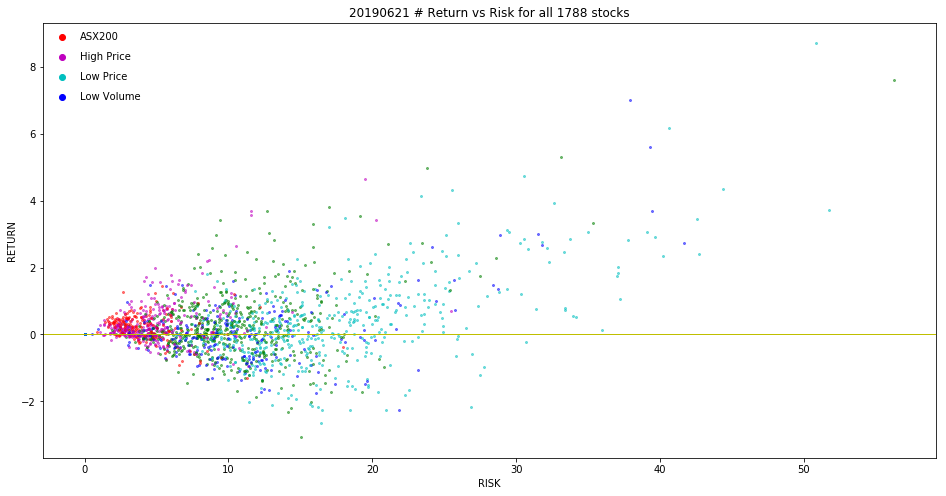

In [207]:
plt.figure(figsize=(16, 8))

# price_percentile=df['start price'].quantile(0.2)
# print(f'Price 10% percentile = {price_percentile}')
low_price = 0.05
asx_200_list = get_asx_200_list()

for i in range(len(df)):
    code = df.iloc[i].name
    return_rank = df.iloc[i]['return']
    risk_rank = df.iloc[i]['VaR 99% Percent']
    volume_rank = df.iloc[i]['volume_rank']
    c = 'g'  # one of {'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'};
    if code in asx_200_list:
        c = 'r'
    elif df.iloc[i]['start price'] > 1:
        c = 'm'
    elif df.iloc[i]['volume_rank'] < 20:
        c = 'b'
    elif df.iloc[i]['start price'] < low_price:
        c = 'c'
    plt.scatter(risk_rank, return_rank, alpha=0.5, c=c, s=4)

plt.scatter([], [], c='r', label='ASX200')
plt.scatter([], [], c='m', label='High Price')
plt.scatter([], [], c='c', label='Low Price')
plt.scatter([], [], c='b', label='Low Volume')

plt.legend(scatterpoints=1, frameon=False, labelspacing=1, loc='upper left')

plt.axhline(y=0, color='y', linestyle='-', linewidth=1)
plt.title(f"{this_week} # Return vs Risk for all {len(df)} stocks")
plt.xlabel("RISK")
plt.ylabel("RETURN")
plt.show()

## Top absolute return & risk scatter

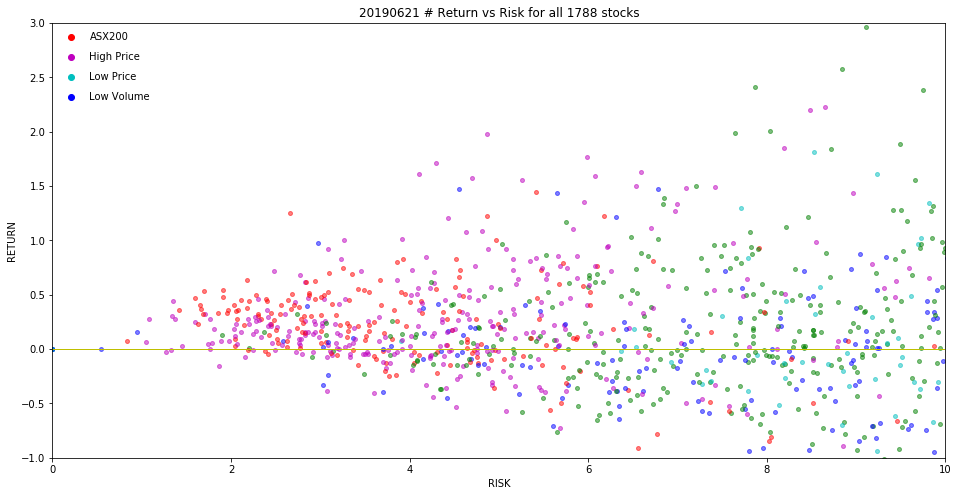

In [208]:
plt.figure(figsize=(16, 8))
plt.ylim(bottom=-1, top=3)
plt.xlim(left=0, right=10)

# price_percentile=df['start price'].quantile(0.2)
# print(f'Price 10% percentile = {price_percentile}')
low_price = 0.05
asx_200_list = get_asx_200_list()

for i in range(len(df)):
    code = df.iloc[i].name
    return_rank = df.iloc[i]['return']
    risk_rank = df.iloc[i]['VaR 99% Percent']
    volume_rank = df.iloc[i]['volume_rank']
    c = 'g'  # one of {'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'};
    if code in asx_200_list:
        c = 'r'
    elif df.iloc[i]['start price'] > 1:
        c = 'm'
    elif df.iloc[i]['volume_rank'] < 20:
        c = 'b'
    elif df.iloc[i]['start price'] < low_price:
        c = 'c'
    plt.scatter(risk_rank, return_rank, alpha=0.5, c=c, s=16)

plt.scatter([], [], c='r', label='ASX200')
plt.scatter([], [], c='m', label='High Price')
plt.scatter([], [], c='c', label='Low Price')
plt.scatter([], [], c='b', label='Low Volume')

plt.legend(scatterpoints=1, frameon=False, labelspacing=1, loc='upper left')

plt.axhline(y=0, color='y', linestyle='-', linewidth=1)
plt.title(f"{this_week} # Return vs Risk for all {len(df)} stocks")
plt.xlabel("RISK")
plt.ylabel("RETURN")
plt.show()

## ASX 200 scatter

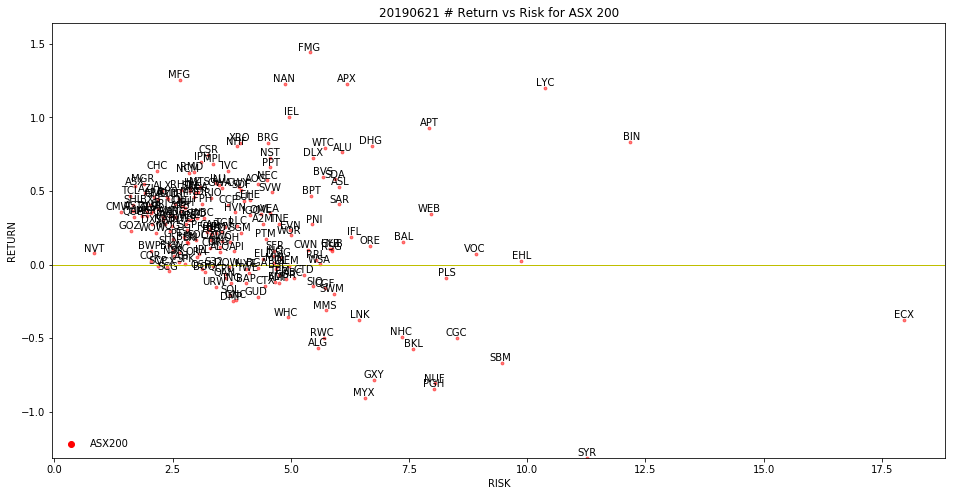

In [218]:
plt.figure(figsize=(16, 8))
asx_200_list = get_asx_200_list()
asx_200 = df[df.index.isin(asx_200_list)].sort_values(by='return',
                                                      ascending=False)

plt.ylim(bottom=asx_200['return'].min(), top=asx_200['return'].max()+0.2)
# plt.xlim(left=0, right=10)

for i in range(len(asx_200)):
    code = asx_200.iloc[i].name
    return_rank = asx_200.iloc[i]['return']
    risk_rank = asx_200.iloc[i]['VaR 99% Percent']
    volume_rank = asx_200.iloc[i]['volume_rank']
    c = 'g'  # one of {'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'};
    if code in asx_200_list:
        c = 'r'
        plt.scatter(risk_rank, return_rank, alpha=0.5, c=c, s=8)
        plt.annotate(code,
                     xy=(risk_rank, return_rank),
                     xytext=(10, 0),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')

plt.scatter([], [], c='r', label='ASX200')
plt.legend(scatterpoints=1, frameon=False, labelspacing=1, loc='lower left')

plt.axhline(y=0, color='y', linestyle='-', linewidth=1)
plt.title(f"{this_week} # Return vs Risk for ASX 200")
plt.xlabel("RISK")
plt.ylabel("RETURN")
plt.show()

## Top percent rank scatter

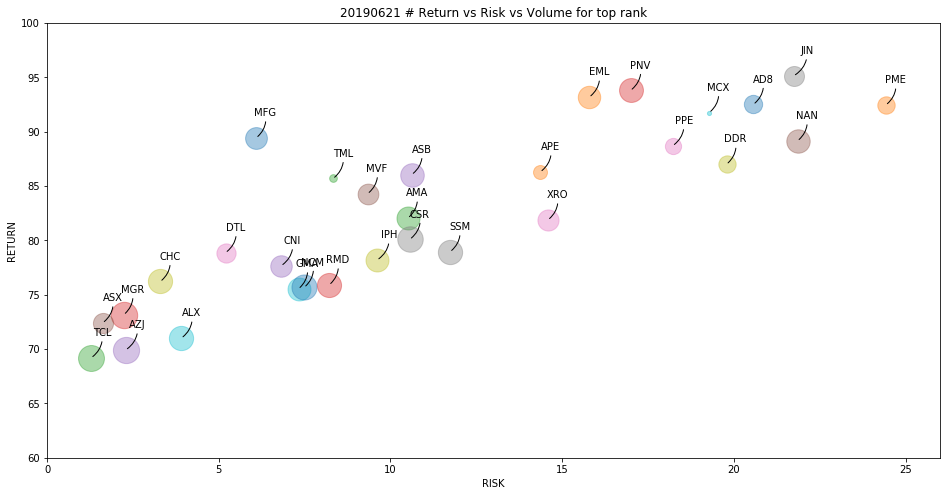

In [213]:
plt.figure(figsize=(16, 8))
plt.ylim(bottom=60, top=100)
plt.xlim(left=0, right=26)

top_df = df.sort_values(by='rank', ascending=False).head(30)
for i in range(len(top_df)):
    code = top_df.iloc[i].name
    return_rank = top_df.iloc[i]['return_rank']
    risk_rank = top_df.iloc[i]['risk_rank']
    volume_rank = top_df.iloc[i]['volume_rank']
    plt.scatter(risk_rank, return_rank, s=volume_rank * 7, alpha=0.4)
    plt.annotate(code,
                 xy=(risk_rank, return_rank),
                 xytext=(20, 20),
                 textcoords='offset points',
                 ha='right',
                 va='bottom',
                 arrowprops=dict(arrowstyle='-',
                                 connectionstyle='arc3,rad=-0.3'))

plt.title(f"{this_week} # Return vs Risk vs Volume for top rank")
plt.xlabel("RISK")
plt.ylabel("RETURN")
plt.show()